     Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

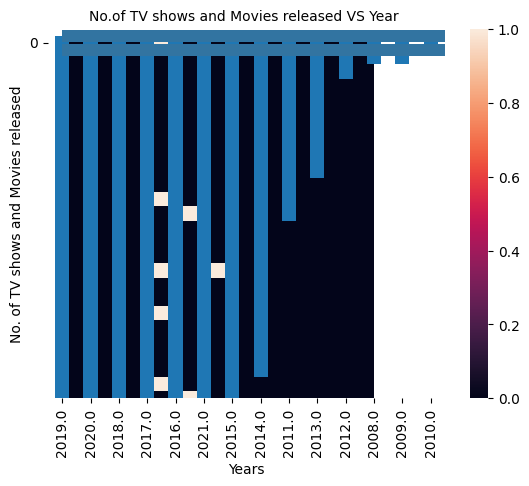

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/dell/Desktop/file.csv")              # importing the dataset
print(data)                     # to show the complete data
print(data.head())              # to show the top 5 rows
print(data.tail())              # to show the end 5 rows
print(data.shape)               # to show the no. of rows and columns
print(data.size)                # to show the total elements in the dataset
print(data.columns)             # to show each column name
print(data.dtypes)              # to show datatype of each column
print(data.info())              # to show indexes, columns, datatypes of each column, memory at once

# detection and deletion of duplicates
print(data[data.duplicated()])
data.drop_duplicates(inplace = True)
print(data[data.duplicated()])

# detection of null values and its representation with Heat-Map
print(data.isnull())
print(data.isnull().sum())
print(sns.heatmap(data.isnull()))

# to show all records of a particular item in any column
print(data[data["Title"].isin(["House of Cards"])])  # here we gathered all the information about House of Cards
print(data[data["Title"].str.contains("House of Cards")])

# to find in which year highest number of TV shows and movies were released using bar graph
data["Date_N"] = pd.to_datetime(data["Release_Date"],errors="coerce")
print(data.head())
print(data.dtypes)
print(data["Date_N"].dt.year.value_counts())   # to show the occurence of an element in a single columndta
data["Date_N"].dt.year.value_counts().plot(kind="bar")
plt.xlabel("Years",fontsize=10)
plt.ylabel("No. of TV shows and Movies released",fontsize=10)
plt.title("No.of TV shows and Movies released VS Year ", fontsize=10)

# to find no. of TV shows and movies in the dataset and depict it through bar graph
print(data.groupby("Category").Category.count())         # to group all the unique items in  acolumn and check their count
colour = ["red","yellow"]
sns.countplot(data["Category"])

# to show all the movies release in 2020
data["Year"] = data["Date_N"].dt.year
print(data[(data["Category"] == "Movie") & (data["Year"] == 2020)])
print(data[(data["Category"] == "TV Show") & (data["Year"] == 2020)])

# to show titles of all TV shows released in INDIA
print(data[(data["Category"] == "TV Show") & (data["Country"] == "India")]["Title"])

# to show top 10 directors on the basis of no. of TV shows and movies given by them
print(data["Director"].value_counts().head(10))

#to show the records where 'category is movies and type is comedy' or 'country is united kingdom'
print(data[(data["Category"] == "Movie") & (data["Type"] == "Comedies")])
print(data[(data["Category"] == "Movie") & (data["Type"] == "Comedies") | (data["Country"] == "United Kingdom")])

# no.of movies starring Tedd Chan
data_new = data.dropna()
print(data_new[data_new["Cast"].str.contains("Tedd Chan")])

# to show different ratings defined by Netflix 
print(data["Rating"].nunique())
print(data["Rating"].unique())
print(data[(data["Category"] == "Movie") & (data["Rating"] == "TV-14")].shape)         # Movies with TV-14 rating
print(data[(data["Category"] == "Movie") & (data["Rating"] == "TV-14") & (data["Country"] == "Canada")].shape)         # Movies with TV-14 rating in Canada      
print(data[(data["Category"] == "TV Show") & (data["Rating"] == "TV-14")].shape)       # TV shows with TV-14 rating

# to show maximum and minimum duration of a movie/TV show on Netflix
print(data.Duration.unique())
print(data.Duration.dtypes)
data[["Minutes","Unit"]] = data["Duration"].str.split(" ",expand = True)
print(data.head(2))
print(data["Minutes"].max())
print(data["Minutes"].min())

# to find the country with highest TV shows 
data_tvshow = data[data["Category"] == "TV Show"]
print(data_tvshow.Country.value_counts().head(1))






























